VOLUME DRIVEN PRICE CHASE

In [21]:
import pandas as pd
import datetime as dt
import pandas_datareader as wb
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [22]:
# print(total_return)
# print(benchmark_return)

In [23]:
start = dt.date(2018,9,20)
end = dt.date(2023,9,20)
asset ='TATAMOTORS.NS'
tin1= yf.download( asset, start, end)
tin1

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,255.050003,257.700012,228.850006,250.350006,249.572159,18547453
2018-09-24,250.199997,251.000000,239.350006,240.199997,239.453690,8889259
2018-09-25,241.000000,243.500000,235.449997,240.800003,240.051834,9030367
2018-09-26,242.300003,243.199997,229.550003,233.350006,232.624985,17810869
2018-09-27,234.800003,236.550003,223.100006,225.250000,224.550140,17430781
...,...,...,...,...,...,...
2023-09-12,638.000000,639.000000,615.250000,620.799988,620.799988,12541377
2023-09-13,621.000000,628.500000,619.549988,625.900024,625.900024,6988358
2023-09-14,628.099976,630.799988,623.299988,624.599976,624.599976,5722295


Text(0, 0.5, 'Price USD($)')

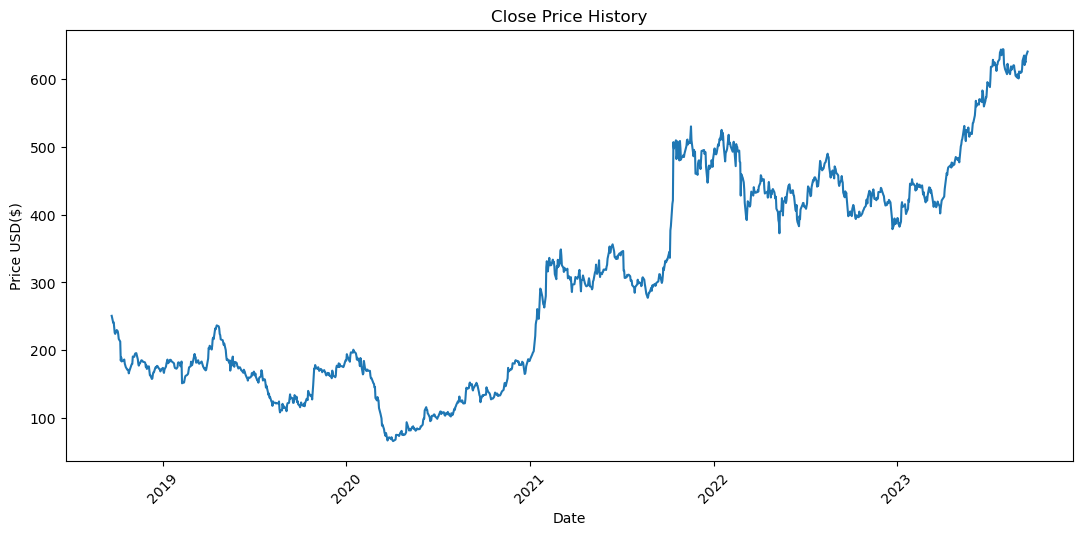

In [24]:
df=tin1
plt.figure(figsize=(13,5.6))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD($)')


In [25]:

# 26-day EMA of the closing price
k = tin1['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# 12-day EMA of the closing price
d = tin1['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtracting the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# 9-Day EMA of the MACD for the Trigger line / signal line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculating the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

# Adding all of our new values for the MACD to the dataframe
tin1['macd'] = tin1.index.map(macd)
tin1['macd_h'] = tin1.index.map(macd_h)
tin1['macd_s'] = tin1.index.map(macd_s)

In [26]:
import numpy as np
df = tin1
# Constructing a 2 x 1 Plotly figure
fig = make_subplots(rows=2, cols=1)

# price Line
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['Open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        # showlegend=False,
        legendgroup='1',

    ), row=1, col=1
)

# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False

    ), row=1, col=1
)

# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macd'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        # showlegend=False,
        legendgroup='2',

    ), row=2, col=1
)

# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macd_s'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)

# Colorize the histogram values
colors = np.where(df['macd_h'] < 0, '#000', '#ff9900')

# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df.index,
        y=df['macd_h'],
        name='histogram',
        marker_color=colors,

    ), row=2, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# Update options and show plot
fig.update_layout(layout)
fig.show()

In [27]:
#  VMA applied as V20
df['V20']=df['Volume'].rolling(window=20).mean()
#  12EMA applied as ma12
df['ma12']= df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
df['Signal']=0
df

,Open,High,Low,Close,Adj Close,Volume,macd,macd_h,macd_s,V20,ma12,Signal
Date,,,,,,,,,,,,
2018-09-21,255.050003,257.700012,228.850006,250.350006,249.572159,18547453,NaN,NaN,NaN,NaN,NaN,0
2018-09-24,250.199997,251.000000,239.350006,240.199997,239.453690,8889259,NaN,NaN,NaN,NaN,NaN,0
2018-09-25,241.000000,243.500000,235.449997,240.800003,240.051834,9030367,NaN,NaN,NaN,NaN,NaN,0
2018-09-26,242.300003,243.199997,229.550003,233.350006,232.624985,17810869,NaN,NaN,NaN,NaN,NaN,0
2018-09-27,234.800003,236.550003,223.100006,225.250000,224.550140,17430781,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12,638.000000,639.000000,615.250000,620.799988,620.799988,12541377,2.286362,1.950050,0.336312,9793340.10,617.195478,0
2023-09-13,621.000000,628.500000,619.549988,625.900024,625.900024,6988358,2.811382,1.980056,0.831326,9414654.30,618.534639,0
2023-09-14,628.099976,630.799988,623.299988,624.599976,624.599976,5722295,3.086976,1.804520,1.282456,9094804.40,619.467768,0


In [28]:
# Signalling buy as 1 in zones of positve divergence ,high volume and undervalue-> checked by exponential moving average with a span of 12 days
# Signalling sell as -1 in zones of negative divergence, high volume and overvalue-> checked by exponential moving average with a span of 12 days
df.loc[(df.V20<df.Volume) & (df.macd_h>0) & (df.Low < df.ma12),'Signal']=1
df.loc[(df.V20<df.Volume) & (df.macd_h<0) & (df.High > df.ma12),'Signal']=-1

In [29]:
# len( and )
print (len(df[ (df.V20<df.Volume) & (df.macd_h>0) & (df.Low < df.ma12) ]  ))
print (len(df[ (df.V20<df.Volume) & (df.macd_h<0) & (df.High >df.ma12) ]  ))

65
88


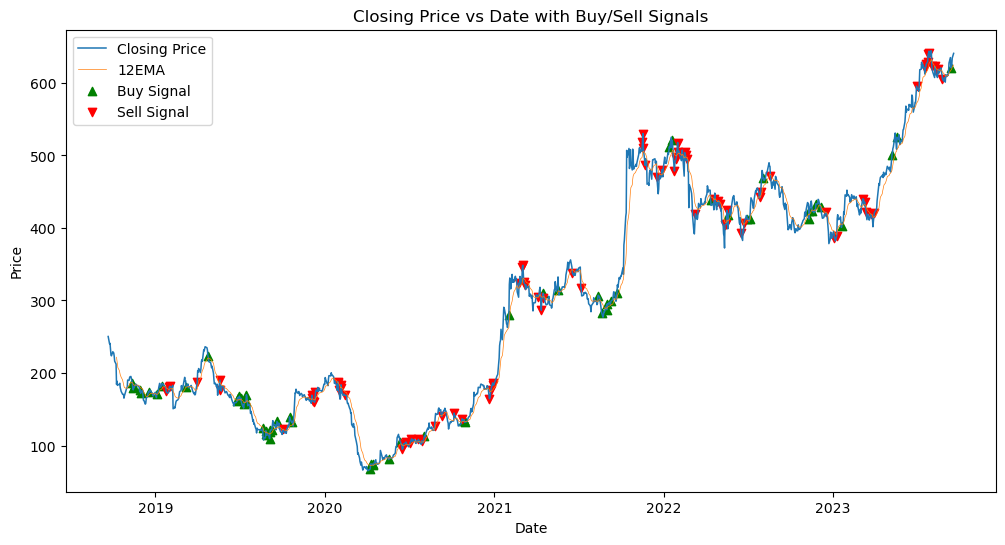

In [30]:
# plot showing buy vs sell signals
plt.figure(figsize=(12, 6))
plt.plot( df['Close'], label='Closing Price', linewidth=1.1)
plt.plot( df['ma12'], label='12EMA', linewidth=0.5)
plt.scatter(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], marker='v', color='r', label='Sell Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price vs Date with Buy/Sell Signals')
plt.legend()
plt.show()

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume,macd,macd_h,macd_s,V20,ma12,Signal
Date,,,,,,,,,,,,
2018-09-21,255.050003,257.700012,228.850006,250.350006,249.572159,18547453,NaN,NaN,NaN,NaN,NaN,0
2018-09-24,250.199997,251.000000,239.350006,240.199997,239.453690,8889259,NaN,NaN,NaN,NaN,NaN,0
2018-09-25,241.000000,243.500000,235.449997,240.800003,240.051834,9030367,NaN,NaN,NaN,NaN,NaN,0
2018-09-26,242.300003,243.199997,229.550003,233.350006,232.624985,17810869,NaN,NaN,NaN,NaN,NaN,0
2018-09-27,234.800003,236.550003,223.100006,225.250000,224.550140,17430781,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12,638.000000,639.000000,615.250000,620.799988,620.799988,12541377,2.286362,1.950050,0.336312,9793340.10,617.195478,1
2023-09-13,621.000000,628.500000,619.549988,625.900024,625.900024,6988358,2.811382,1.980056,0.831326,9414654.30,618.534639,0
2023-09-14,628.099976,630.799988,623.299988,624.599976,624.599976,5722295,3.086976,1.804520,1.282456,9094804.40,619.467768,0


In [32]:
df.insert(0, 'SNo', range(1, 1 + len(df)))

In [33]:
curr_signal = 0
buy_signals = []
sell_signals = []
n_profit_trades = 0
n_loss_trades = 0
returns_record =[]
# Implement the trading strategy
for i in range(1, len(df)):
    if (df['V20'][i] < df['Volume'][i]) and (df['macd_h'][i]>0) and (df['Low'][i] <= df['ma12'][i]) and curr_signal <= 0:
        buy_signals.append(df.SNo[i])
        curr_signal = 1
        if (len(sell_signals) >0):
            x=sell_signals[-1]
            trade_return = (df['Close'][x] / df['Close'][i]) - 1
            returns_record.append(trade_return*100)
            if trade_return > 0:
                n_profit_trades += 1
            else:
                n_loss_trades += 1
    elif (df['V20'][i] < df['Volume'][i]) and (df['macd_h'][i]<0) and (df['High'][i] > df['ma12'][i]) and curr_signal >= 0:
        # Decreasing volume and gap-down - Sell signal
        sell_signals.append(df.SNo[i])
        curr_signal = -1

        # Calculate trade profit/loss
        if (len(buy_signals) >0):
            x=buy_signals[-1]
            trade_return = (df['Close'][i] / df['Close'][x]) - 1
            returns_record.append(trade_return*100)
            if trade_return > 0:
                n_profit_trades += 1
            else:
                n_loss_trades += 1

if (curr_signal == 1):
  sell_signals.append(df.index[-1])
  curr_signal = 0
  x=buy_signals[-1]
  trade_return = (df['Close'][i] / df['Close'][x]) - 1
  if trade_return > 0:
    n_profit_trades += 1
  else:
    n_loss_trades += 1

In [34]:
returns = df['Close'].pct_change()
cumulative_returns = (1 + returns).cumprod()

# Calculate portfolio value
initial_balance = 100000  # Initial portfolio balance
balance = initial_balance
position = 0

#For CSV File
action=[]
date=[]
stock=[]
portfolio_value=[]

for i in range(len(df)):
    if df.SNo[i] in buy_signals:
        balance += (-position)*df['Close'][i]
        position = balance // df['Close'][i]
        balance -= position * df['Close'][i]
        action.append('Buy')
        date.append(df.index[i])
        stock.append(position)
        portfolio_value.append(balance)
    elif df.SNo[i] in sell_signals:
        balance += position * df['Close'][i]
        position = -balance // df['Close'][i]
        balance -=  (-position) * df['Close'][i]
        action.append('Sell')
        date.append(df.index[i])
        stock.append(position)
        portfolio_value.append(balance)

# Calculate performance metrics
total_return = (balance + position * df['Close'][-1]) / initial_balance - 1
annualized_return = (1 + total_return) ** (252 / len(df)) - 1  # Assuming 252 trading days in a year
benchmark_return = df['Close'][-1] / df['Close'][0] - 1
num_trades = len(buy_signals) + len(sell_signals) -1
daily_returns = cumulative_returns.pct_change()
max_drawdown = (1 - cumulative_returns / cumulative_returns.cummax()).max()
win_ratio = ((n_profit_trades / num_trades))

In [35]:
dff = pd.DataFrame(data=returns_record)
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = num_trades # 255 trading days in a year
rf =0.07 # 7% risk free rate
# sh =sharpe_ratio(returns_record, N, rf)
sharperatio = dff.apply(sharpe_ratio, args=(N,rf,),axis=0)
# sh
sharperatio =sharperatio[0]


In [36]:
# Print summary (Momentum Strategy)
print(f'Total Return: {total_return:.2%}')
print(f'Annualized Return: {annualized_return:.2%}')
print(f'Benchmark Return: {benchmark_return:.2%}')
print(f'Number of Trades: {num_trades}')
print(f'Max Drawdown: {max_drawdown:.2%}')

# Print number of profit and loss trades
print(f'Number of Profit-Making Trades: {n_profit_trades}')
print(f'Number of Loss-Making Trades: {n_loss_trades}')

#Win Ratio
print(f'Win Ratio: {win_ratio:.2%}')

# Sharpe ratio
print("Sharpe ratio:",sharperatio)

Total Return: 244.13%
Annualized Return: 28.71%
Benchmark Return: 155.90%
Number of Trades: 39
Max Drawdown: 72.88%
Number of Profit-Making Trades: 24
Number of Loss-Making Trades: 15
Win Ratio: 61.54%
Sharpe ratio: 1.4114808246300894


In [37]:
returns_record

[-2.2841259629613475,
 -4.38741560824254,
 3.0244706161127066,
 -9.235245345079957,
 -14.288939073655005,
 9.745497426085814,
 -26.19837381888145,
 -14.229389587183583,
 23.785156259582042,
 145.7100737466772,
 27.010726458485102,
 -15.612561742079912,
 14.042173130921508,
 3.1413590457059604,
 21.304836310812725,
 -41.005009532377066,
 0.6211180124223503,
 3.758062547253016,
 11.944260361320435,
 9.248362023846003,
 68.93408878534377,
 3.555036971006298,
 -6.167872536950425,
 11.921058967649412,
 2.2039207212697587,
 7.18899229496861,
 -6.762367819317983,
 -5.548804337853763,
 7.1601615989642875,
 -4.116013658389905,
 1.2358946802794257,
 10.286267016214602,
 -0.44864082561614227,
 3.683494066312365,
 7.7620011461278615,
 -12.22777466673951,
 18.24679738115369,
 -4.832474321826941]

In [38]:
# Save summary to CSV (Momentum Strategy)
summary = pd.DataFrame({
    'Date': date,
    'Action': action,
    'No. Of Stocks': stock,
    'Portfolio Value': portfolio_value
    #, 'Returns': returns_record
})
returns_record.insert(0,0)
summary.insert(3, 'Returns' ,returns_record)
summary.to_csv('summary.csv', index=False)

In [39]:
# summary.to_csv('TataMotors_summary.csv', index=True)
# SUBMITTED BY : KRIPANSH MOHIT
# ENROLLMENT: 21112065